# Checking out different product categories in data set

Eligible product categories for analysis and modelling have to meet the following criteria:
- sufficient number of transactions/samples, aka sufficiently high purchase frequency
- good distribution of target variable new purchases
- from a domain perspective, neither too price- and private label-driven nor characterized by too high consumer involvement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
transactions = pd.read_csv("../00_original_data/transaction_data.csv")
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [4]:
products = pd.read_csv("../00_original_data/product.csv")
products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [6]:
#Append category information to transactions
transactions = pd.merge(transactions, products, how = "left", on = "PRODUCT_ID")
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595732 entries, 0 to 2595731
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         int64  
 1   BASKET_ID             int64  
 2   DAY                   int64  
 3   PRODUCT_ID            int64  
 4   QUANTITY              int64  
 5   SALES_VALUE           float64
 6   STORE_ID              int64  
 7   RETAIL_DISC           float64
 8   TRANS_TIME            int64  
 9   WEEK_NO               int64  
 10  COUPON_DISC           float64
 11  COUPON_MATCH_DISC     float64
 12  MANUFACTURER          int64  
 13  DEPARTMENT            object 
 14  BRAND                 object 
 15  COMMODITY_DESC        object 
 16  SUB_COMMODITY_DESC    object 
 17  CURR_SIZE_OF_PRODUCT  object 
dtypes: float64(4), int64(9), object(5)
memory usage: 376.3+ MB


In [7]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [8]:
transactions["COMMODITY_DESC"].value_counts()

SOFT DRINKS                     117532
FLUID MILK PRODUCTS              85630
BAKED BREAD/BUNS/ROLLS           83232
CHEESE                           74885
BAG SNACKS                       67190
                                 ...  
NDAIRY/TEAS/JUICE/SOD                2
MISCELLANEOUS(CORP USE ONLY)         1
EASTER LILY                          1
MISCELLANEOUS CROUTONS               1
FROZEN PACKAGE MEAT                  1
Name: COMMODITY_DESC, Length: 308, dtype: int64

In [9]:
#add column with first purchase per product per household
transactions["first_purchase"] = np.NaN
transactions["first_purchase"].loc[transactions.groupby(["household_key", "PRODUCT_ID"]).DAY.idxmin()] = 1
transactions["first_purchase"].value_counts()

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_6372\2806816894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["first_purchase"].loc[transactions.groupby(["household_key", "PRODUCT_ID"]).DAY.idxmin()] = 1


1.0    1401469
Name: first_purchase, dtype: int64

In [10]:
transactions["first_purchase"] = transactions["first_purchase"].fillna(0)

In [11]:
transactions["first_purchase"].value_counts()

1.0    1401469
0.0    1194263
Name: first_purchase, dtype: int64

In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595732 entries, 0 to 2595731
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         int64  
 1   BASKET_ID             int64  
 2   DAY                   int64  
 3   PRODUCT_ID            int64  
 4   QUANTITY              int64  
 5   SALES_VALUE           float64
 6   STORE_ID              int64  
 7   RETAIL_DISC           float64
 8   TRANS_TIME            int64  
 9   WEEK_NO               int64  
 10  COUPON_DISC           float64
 11  COUPON_MATCH_DISC     float64
 12  MANUFACTURER          int64  
 13  DEPARTMENT            object 
 14  BRAND                 object 
 15  COMMODITY_DESC        object 
 16  SUB_COMMODITY_DESC    object 
 17  CURR_SIZE_OF_PRODUCT  object 
 18  first_purchase        float64
dtypes: float64(5), int64(9), object(5)
memory usage: 460.6+ MB


In [13]:
pd.set_option("display.max_rows", None)
transactions[["first_purchase", "COMMODITY_DESC"]].groupby("COMMODITY_DESC").mean().to_clipboard(excel=True)

## Aggregate transaction data 
New data contains per product category
- overall number of transactions
- % of new purchases among all transactions

In [14]:
categories_agg = pd.DataFrame(transactions.groupby(["COMMODITY_DESC"])["first_purchase"].agg(["count", "mean"]))
categories_agg

,count,mean
COMMODITY_DESC,,
,7839,0.271080
(CORP USE ONLY),61,0.901639
ADULT INCONTINENCE,553,0.367089
AIR CARE,5556,0.792297
ANALGESICS,4769,0.818830
ANTACIDS,1889,0.753838
APPAREL,510,0.949020
APPLES,14440,0.511981
AUDIO/VIDEO PRODUCTS,1073,0.972973


In [15]:
categories_agg.rename(columns = {"mean" : "PCT_first_purchase", "count" :"NUMBER_ENTRIES"}, inplace = True)
categories_agg.head()

,NUMBER_ENTRIES,PCT_first_purchase
COMMODITY_DESC,,
,7839,0.271080
(CORP USE ONLY),61,0.901639
ADULT INCONTINENCE,553,0.367089
AIR CARE,5556,0.792297
ANALGESICS,4769,0.818830


Only look at product categories with at least 40k overall transactions and sort in descending order

In [16]:
categories_agg = categories_agg[categories_agg["NUMBER_ENTRIES"] >= 40000].sort_values(by = "NUMBER_ENTRIES", ascending = False)
categories_agg

,NUMBER_ENTRIES,PCT_first_purchase
COMMODITY_DESC,,
SOFT DRINKS,117532,0.384312
FLUID MILK PRODUCTS,85630,0.185017
BAKED BREAD/BUNS/ROLLS,83232,0.396590
CHEESE,74885,0.520198
BAG SNACKS,67190,0.554517
FRZN MEAT/MEAT DINNERS,56064,0.583619
BEEF,48726,0.531687
SOUP,46135,0.571844
YOGURT,44697,0.440141


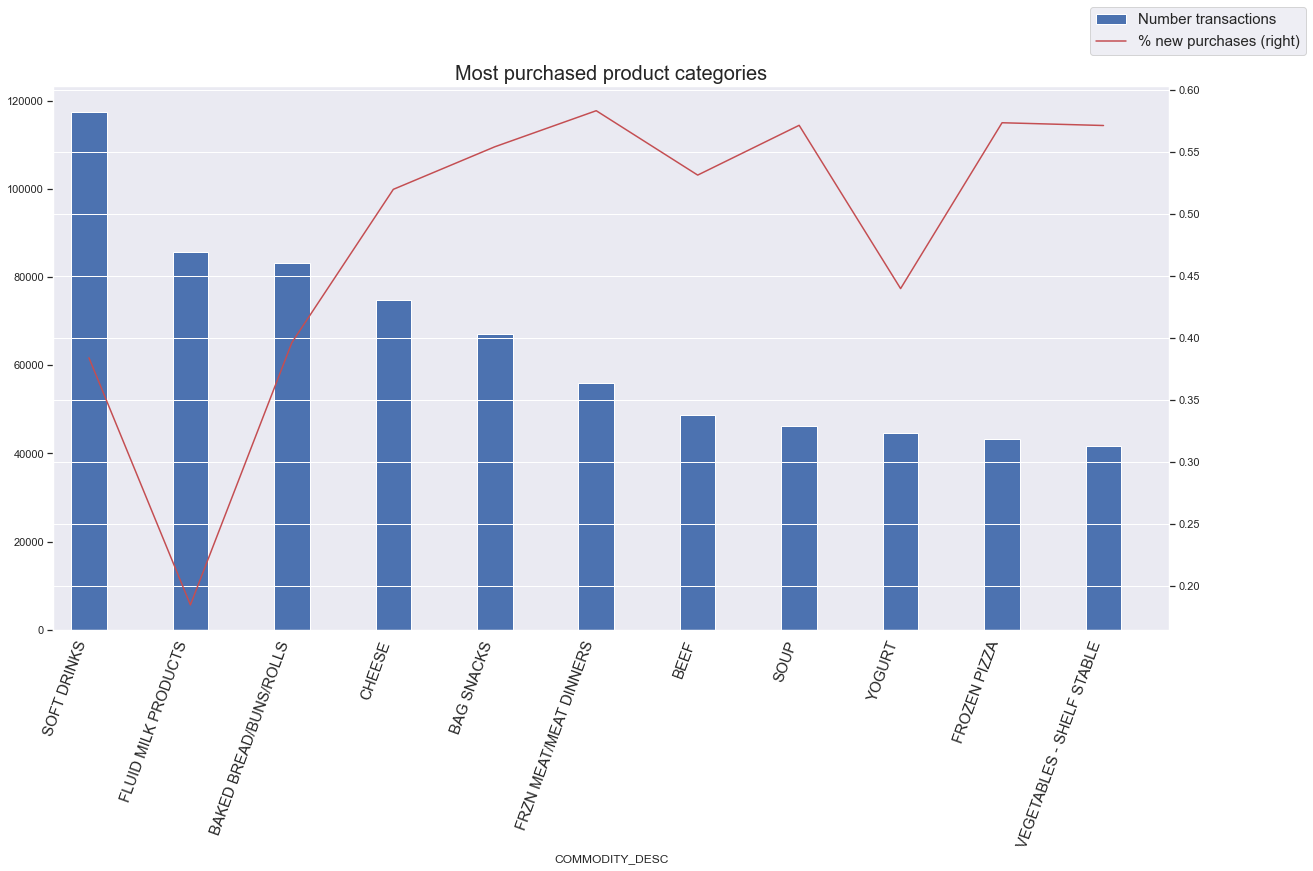

In [27]:
fig, axes = plt.subplots(figsize=(20,10))

width = 0.35

categories_agg["NUMBER_ENTRIES"].plot(kind = "bar", width = width, label = "Number transactions")
categories_agg["PCT_first_purchase"].plot(secondary_y = True, label = "% new purchases", color = "r")

ax = plt.gca()
plt.xlim([-width, len(categories_agg['NUMBER_ENTRIES'])-width])

axes.set_xticklabels(categories_agg.index, rotation=70, ha='right', fontsize = 15)
axes.set_title("Most purchased product categories", fontsize = 20)
fig.legend(fontsize = 15)

plt.show()